In [1]:
import os
import pandas as pd
import numpy as np
from cycler import cycler
import matplotlib as mpl
import matplotlib.pyplot as plt

FILENAME = 'results/results7.csv'
TESTDIR = 'tests/test7_unfix_c6'
PLOTDIR = 'tests/test7_unfix_c6/plots'
FORMAT = 'png'

# Create target Directory if don't exist
if not os.path.exists(PLOTDIR):
    os.mkdir(PLOTDIR)
    print("Directory " , PLOTDIR ,  " Created ")

Directory  tests/test7_unfix_c6/plots  Created 


In [2]:
''' Merge csv files '''

dlist = []
dirs = [d for d in os.listdir(TESTDIR) if os.path.isdir(os.path.join(TESTDIR,d))]
for d in dirs:
	d = os.path.abspath(TESTDIR+'/'+d)
	dlist += [os.path.join(d,file) for file in os.listdir(d) if file.endswith(".csv")]

df = pd.read_csv(dlist[0], skipinitialspace=True)
for x in range(1,len(dlist)):
    df = df.append(pd.read_csv(dlist[x], skipinitialspace=True))
df.to_csv(FILENAME,index=False)

In [3]:
def autolabel(rects):
	for rect in rects:
		height = rect.get_height()
		ax.annotate('{}'.format(height),
					xy=(rect.get_x() + rect.get_width() / 2, height),
					xytext=(0, 3),  # 3 points vertical offset
					textcoords="offset points",
					ha='center', va='bottom')

In [4]:
''' Find stdev map files '''

map_list = []
for d in dirs:
	d = os.path.abspath(TESTDIR+'/'+d)
	map_list += [os.path.join(d,file) for file in os.listdir(d) if file == 'map_files.txt']

''' Make a stdev column '''

df = pd.read_csv(FILENAME, skipinitialspace=True)
df['stdev'] = pd.Series(np.zeros(len(df['structure'])), index=df.index)

for file in map_list:
    method = file.split('/')[-2]
    for line in open(file,'r'):
        if 'rat_structure' in line:
            stdev = float(line.split(':')[-2].split('/')[-2][3:])
            struct = line.split(':')[-1].lstrip(' ').rstrip('\n')
            mask = (df['method'] == method) & (df['structure'] == struct)
            df.loc[mask,'stdev'] = stdev

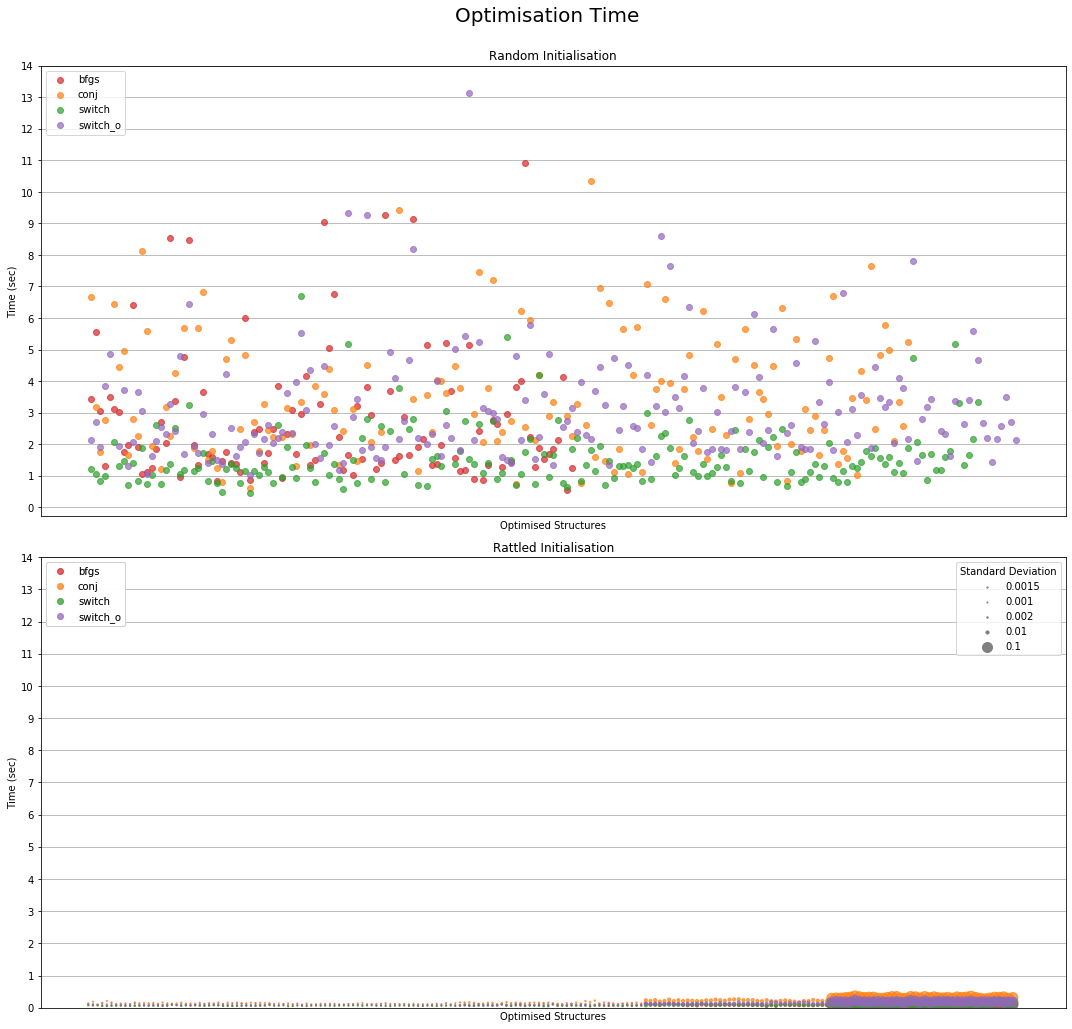

In [5]:
''' Optimisation time per method (diff no. of total structures) '''

FONTSIZE = 12

methods = list(df['method'].unique())
maps = list(df['method'])
ran_succ = df[df['structure'].str.contains(
		"rat") == False]
ran_succ = ran_succ.loc[ran_succ['opt_succ'] == True] # find successful optimisations
rat_succ = df[df['structure'].str.contains(
		"rat") == True]
rat_succ = rat_succ.loc[rat_succ['opt_succ'] == True] 


fig, axs = plt.subplots(2,figsize=(15,15))
colors = {'red' : methods[0], 
          'orange' : methods[1], 
          'green' : methods[2], 
          'purple' : methods[3]}

clabels = ['red', 'orange', 'green', 'purple']

# Random

axs[0].grid(zorder=0)
for color in clabels:
    x = ran_succ.loc[ran_succ['method'] == colors[color]]['structure']
    y = ran_succ.loc[ran_succ['method'] == colors[color]]['opt_time']
    axs[0].scatter(x, y, c='tab:'+color, label=colors[color],
               zorder=3, alpha=0.7)

# Rattled  

axs[1].grid(zorder=0)
slabels = []
for color in clabels:
    x = rat_succ.loc[rat_succ['method'] == colors[color]]['structure']
    y = rat_succ.loc[rat_succ['method'] == colors[color]]['opt_time']
    sizes = rat_succ.loc[rat_succ['method'] == colors[color]]['stdev']
    slabels += [s for s in sizes.unique() if s not in slabels]
    scatter = axs[1].scatter(x, y, s=sizes*1000, c='tab:'+color,
                            zorder=3, alpha=0.7)

start0, end0 = axs[0].get_ylim()
start1, end1 = axs[1].get_ylim()    

end = max(end0, end1)+1

axs[0].legend(loc="upper left")
axs[0].set_xticks([])
axs[0].set_xlabel('Optimised Structures')
axs[0].set_ylabel('Time (sec)')
axs[0].yaxis.set_ticks(np.arange(0, end))
axs[0].set_title('Random Initialisation', fontsize=FONTSIZE)

h = [plt.scatter([],[], s=i*1000, c="gray") for i in slabels]
leg = plt.legend(handles=h, labels=slabels,loc="upper right", title="Standard Deviation")
axs[1].add_artist(leg)

h = [plt.plot([],[], color='tab:'+c, alpha=0.7, marker="o", ls="")[0] for c in colors]
leg = plt.legend(handles=h, labels=[colors[c] for c in colors],loc="upper left")
axs[1].add_artist(leg)

axs[1].set_xlabel('Optimised Structures')
axs[1].set_ylabel('Time (sec)')
axs[1].yaxis.set_ticks(np.arange(0, end))
axs[1].set_title('Rattled Initialisation', fontsize=FONTSIZE)
axs[1].set_xticks([])

fig.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.suptitle('Optimisation Time',x=0.51, fontsize=20)

plt.savefig(PLOTDIR+'/'+'OptTime', format=FORMAT)
plt.show()

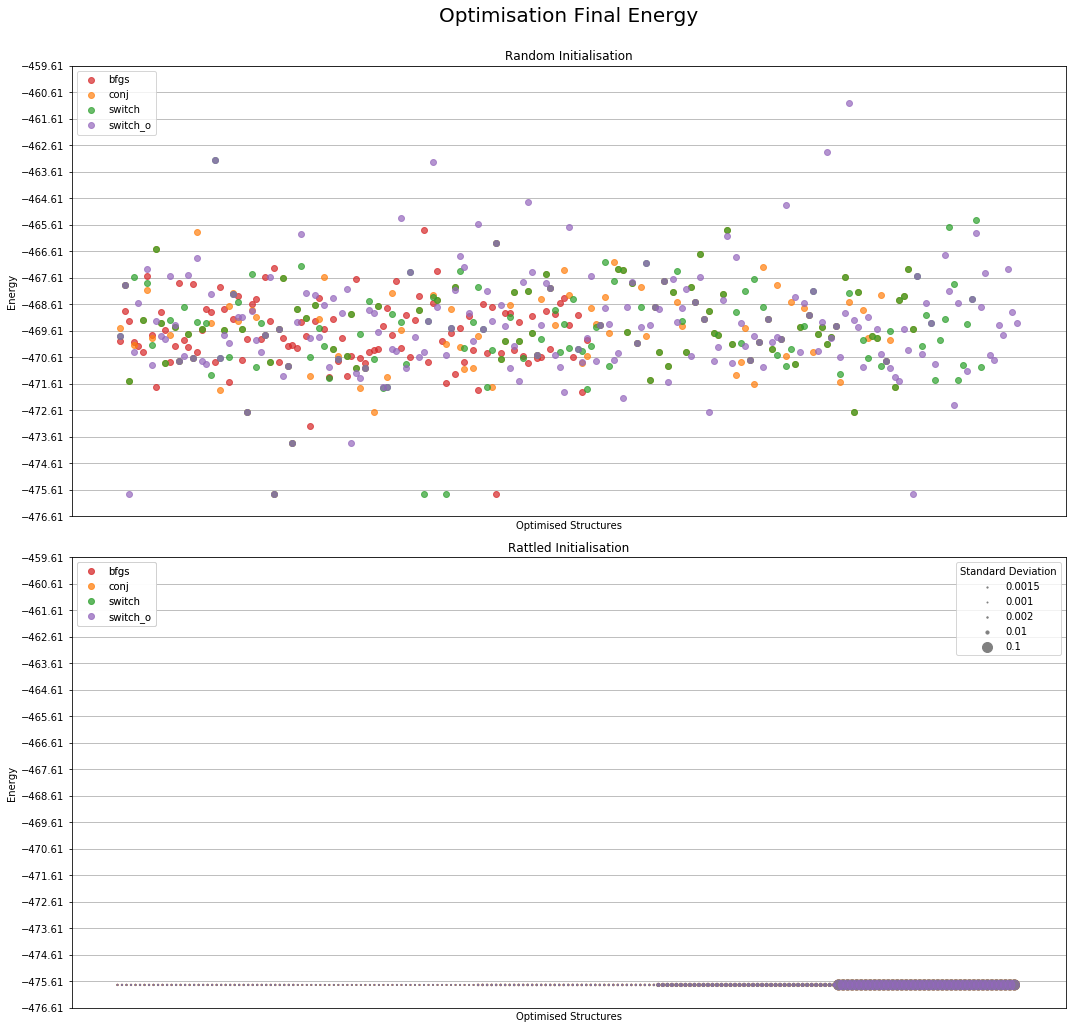

In [6]:
''' Optimised energy  '''

FONTSIZE = 12

methods = list(df['method'].unique())
maps = list(df['method'])
ran_succ = df[df['structure'].str.contains(
		"rat") == False]
ran_succ = ran_succ.loc[ran_succ['opt_succ'] == True] # find successful optimisations
rat_succ = df[df['structure'].str.contains(
		"rat") == True]
rat_succ = rat_succ.loc[rat_succ['opt_succ'] == True] 

fig, axs = plt.subplots(2,figsize=(15,15))
colors = {'red' : methods[0], 
          'orange' : methods[1], 
          'green' : methods[2], 
          'purple' : methods[3]}

clabels = ['red', 'orange', 'green', 'purple']

# Random

axs[0].grid(zorder=0)
for color in clabels:
    x = ran_succ.loc[ran_succ['method'] == colors[color]]['structure']
    y = ran_succ.loc[ran_succ['method'] == colors[color]]['energy']
    axs[0].scatter(x, y, c='tab:'+color, label=colors[color],
               zorder=3, alpha=0.7)
    
# Rattled    

slabels = []
axs[1].grid(zorder=0)
for color in clabels:
    x = rat_succ.loc[rat_succ['method'] == colors[color]]['structure']
    y = rat_succ.loc[rat_succ['method'] == colors[color]]['energy']
    sizes = rat_succ.loc[rat_succ['method'] == colors[color]]['stdev']
    slabels += [s for s in sizes.unique() if s not in slabels]
    scatter = axs[1].scatter(x, y, s=sizes*1000, c='tab:'+color,
                            zorder=3, alpha=0.7)

start0, end0 = axs[0].get_ylim()
start1, end1 = axs[1].get_ylim()    

start = min(start0, start1)
end = max(end0, end1)+1

axs[0].legend(loc="upper left")
axs[0].set_xticks([])
axs[0].set_xlabel('Optimised Structures')
axs[0].set_ylabel('Energy')
axs[0].yaxis.set_ticks(np.arange(start, end))
axs[0].set_title('Random Initialisation', fontsize=FONTSIZE)

h = [plt.scatter([],[], s=i*1000, c="gray") for i in slabels]
leg = plt.legend(handles=h, labels=slabels,loc="upper right", title="Standard Deviation")
axs[1].add_artist(leg)

h = [plt.plot([],[], color='tab:'+c, alpha=0.7, marker="o", ls="")[0] for c in colors]
leg = plt.legend(handles=h, labels=[colors[c] for c in colors],loc="upper left")
axs[1].add_artist(leg)

axs[1].set_xlabel('Optimised Structures')
axs[1].set_ylabel('Energy')
axs[1].yaxis.set_ticks(np.arange(start, end))
axs[1].set_title('Rattled Initialisation', fontsize=FONTSIZE)
axs[1].set_xticks([])

fig.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.suptitle('Optimisation Final Energy',x=0.53, fontsize=20)

plt.savefig(PLOTDIR+'/'+'OptEnergy', format=FORMAT)
plt.show()

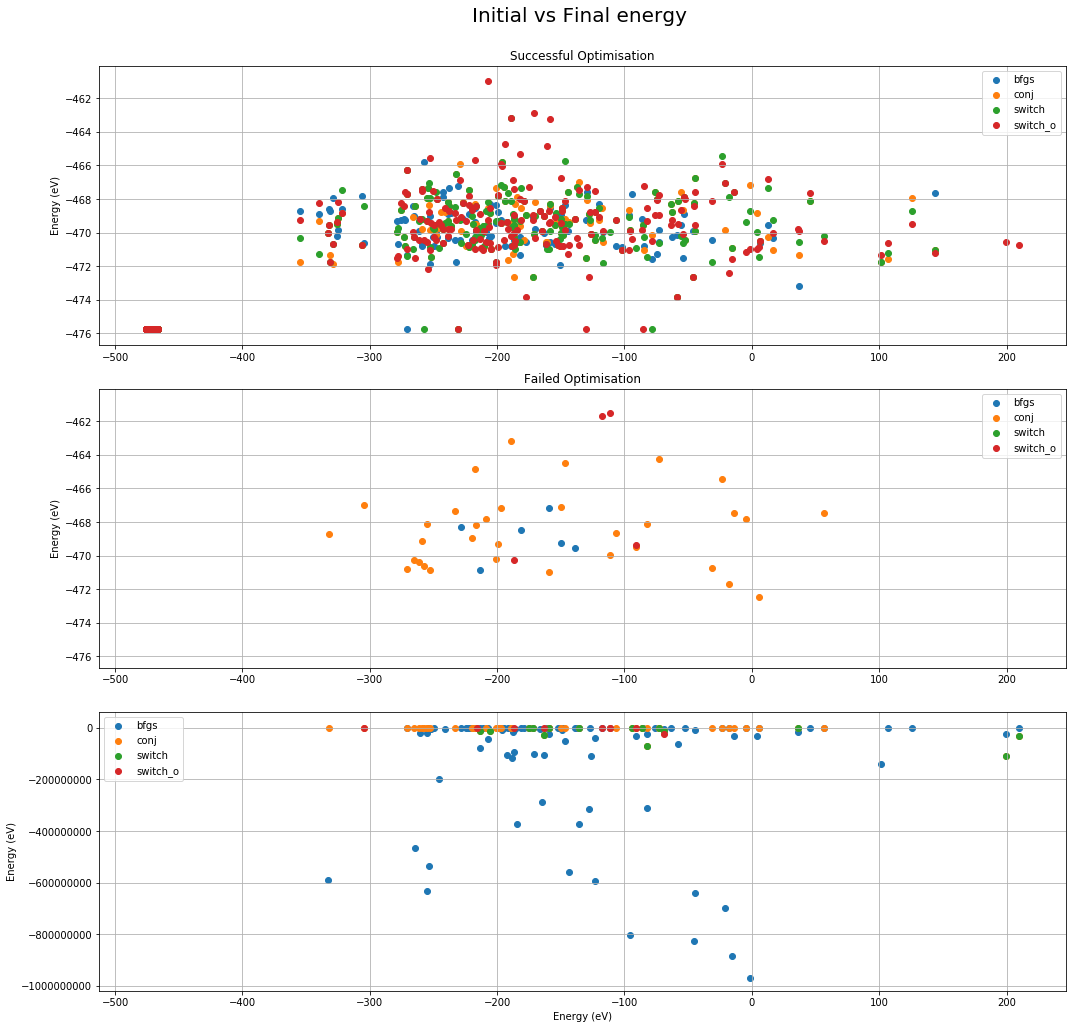

In [7]:
''' Initial vs final energy '''

filename = 'iters'
df = pd.read_csv(FILENAME, skipinitialspace=True)
dfe = pd.read_csv(TESTDIR+'/'+filename+'_energy.csv', skipinitialspace=True)
methods = list(df['method'].unique()) # list of methods

fig, axs = plt.subplots(3, 1, figsize=(15,15))

# Total 
for method in methods: # for each method keep structures from both dfs
    x,y = [],[]
    
    total_m = df.loc[(df['method'] == method)][['structure',
                                                   'opt_succ']].set_index('structure')
    dfe_m = dfe[dfe['method'] == method] # results for this method 
    dfe_m.set_index('structure')
    e_res = dfe_m.join(total_m, on='structure') # join on each struct

    # find successful cases
    e_succ = e_res.loc[e_res['opt_succ'] == True]
    e_succ.drop(['opt_succ'], axis=1)
    for index,row in e_succ.iterrows():
        row = row.dropna() # drop NaN values
        values = row[2:-1]
        x.append(values[0]) # initial energy
        y.append(values[-1]) # final energy
    axs[0].scatter(x, y, label=method)
    axs[0].legend()
    
    x,y = [],[]
    
    # find failed cases
    e_fail = e_res.loc[e_res['opt_succ'] == False]
    e_fail.drop(['opt_succ'], axis=1)
    for index,row in e_fail.iterrows():
        row = row.dropna() # drop NaN values
        values = row[2:-1]
        x.append(values[0]) # initial energy
        y.append(values[-1]) # final energy
    axs[1].scatter(x, y, label=method)
    axs[1].legend()
    axs[2].scatter(x, y, label=method)
    axs[2].legend()
    
axs[0].grid()
axs[0].set_title('Successful Optimisation')
starty, endy = axs[0].get_ylim()
startx, endx = axs[0].get_xlim()
axs[0].set(ylabel='Energy (eV)')

axs[1].grid()
axs[1].set_title('Failed Optimisation')
axs[1].set_ylim(starty, endy)
axs[1].set_xlim(startx, endx)
axs[1].set(ylabel='Energy (eV)')

axs[2].grid()
axs[2].set_xlim(startx, endx)
axs[2].ticklabel_format(style='plain', axis='y', scilimits=(0,0))
axs[2].set(xlabel='Energy (eV)', ylabel='Energy (eV)')
    
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.suptitle('Initial vs Final energy',x=0.54, fontsize=20)
plt.savefig(PLOTDIR+'/'+'InitFinalE', format=FORMAT)
plt.show()